Epoch 1, Loss: 1.2481
Epoch 2, Loss: 0.3994
Epoch 3, Loss: 0.2795
Epoch 4, Loss: 0.2148
Epoch 5, Loss: 0.1723
Epoch 6, Loss: 0.1426
Epoch 7, Loss: 0.1203
Epoch 8, Loss: 0.1027
Epoch 9, Loss: 0.0886
Epoch 10, Loss: 0.0768
Epoch 11, Loss: 0.0668
Epoch 12, Loss: 0.0582
Epoch 13, Loss: 0.0507
Epoch 14, Loss: 0.0441
Epoch 15, Loss: 0.0383
Epoch 16, Loss: 0.0332
Epoch 17, Loss: 0.0288
Epoch 18, Loss: 0.0248
Epoch 19, Loss: 0.0213
Epoch 20, Loss: 0.0183
Test Accuracy: 95.69%


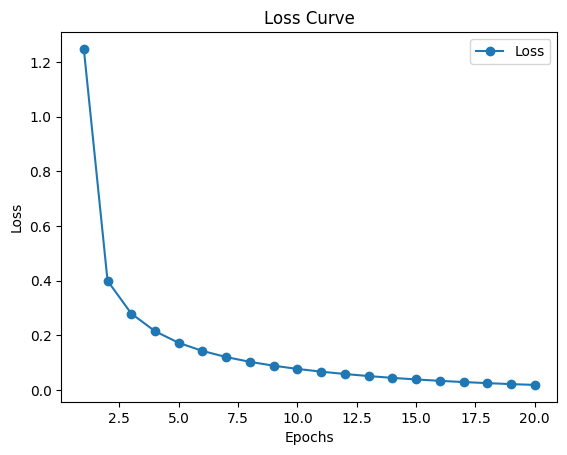

In [1]:
#OBJECTIVE:Implementation of BPNN using TensorFlow Library.

#DESCRIPTION OF CODE:This TensorFlow script implements a simple neural network for classifying handwritten digits from the 
#MNIST dataset. It preprocesses the data by normalizing pixel values and flattening images into vectors. The model consists of one hidden layer with 128 neurons (sigmoid activation) and an output layer with 10 neurons (softmax activation). The network is trained using categorical cross-entropy loss and the Adam optimizer over 20 epochs with a batch size of 32. 
#Finally, it evaluates accuracy on the test set and visualizes the loss curve. 

import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize input data
x_train, x_test = tf.cast(x_train, tf.float32) / 255.0, tf.cast(x_test, tf.float32) / 255.0

# Flatten images
x_train, x_test = tf.reshape(x_train, [-1, 28 * 28]), tf.reshape(x_test, [-1, 28 * 28])

# Define model parameters
hidden_units = 128
output_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([28 * 28, hidden_units]))
b1 = tf.Variable(tf.zeros([hidden_units]))
W2 = tf.Variable(tf.random.normal([hidden_units, output_size]))
b2 = tf.Variable(tf.zeros([output_size]))

# Define forward pass
def forward_pass(x):
    hidden_layer = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
    return tf.nn.softmax(tf.matmul(hidden_layer, W2) + b2)  # Using softmax for classification

# Define loss function and optimizer
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.losses.sparse_categorical_crossentropy(y_true, y_pred))

optimizer = tf.optimizers.Adam()

# Training loop
epochs = 20
batch_size = 32
loss_history = []
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

for epoch in range(epochs):
    epoch_loss = 0
    for x_batch, y_batch in dataset.as_numpy_iterator():
        with tf.GradientTape() as tape:
            y_pred = forward_pass(x_batch)
            loss = compute_loss(y_batch, y_pred)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        epoch_loss += loss.numpy()
    
    loss_history.append(epoch_loss / len(dataset))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(dataset):.4f}")

# Evaluate the model
accuracy = tf.reduce_mean(tf.cast(tf.argmax(forward_pass(x_test), axis=1) == y_test, tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

# Plot loss curve
plt.plot(range(1, epochs + 1), loss_history, marker='o', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [ ]:
# Comments about this model:
# This simplified BPNN model uses TensorFlow without Keras and NumPy.
# It loads MNIST using TensorFlow, flattens images, and implements a basic neural network with one hidden layer.